In [253]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [254]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

In [255]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [256]:
# Read the given CSV file, and view some sample records
car_price_df = pd.read_csv("CarPrice_Assignment.csv")
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data quality checks

In [257]:
# check shape of data frame
car_price_df.shape

(205, 26)

In [258]:
# check info of data frame
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [259]:
# check distribution of data 
car_price_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [260]:
# let's check na in data frame 
car_price_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [261]:
# Remove duplicate values if any
car_price_df=car_price_df.drop_duplicates() 
car_price_df.shape

(205, 26)

In [262]:
car_price_df['enginetype'] = car_price_df['enginetype'].str.replace('ohcf','ohc')
car_price_df['enginetype'] = car_price_df['enginetype'].str.replace('dohcv','dohc')
car_price_df['enginetype'] = car_price_df['enginetype'].str.replace('ohcv','ohc')

In [263]:
# fix the differences in data to get the company name 
car_price_df['CarName'] = car_price_df['CarName'].str.replace('-',' ')
car_price_df['CarName'] = car_price_df['CarName'].apply(lambda x: x.split(' ')[0])
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [264]:
# Convert all text to lower case to avoid any case sensitive issue
car_price_df=car_price_df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
print(car_price_df['CarName'].unique())

['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'maxda'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota' 'toyouta'
 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [265]:
# create function to correct spelling for car company name
def company_name(name):
    if name == "maxda":
        return "mazda"
    if name == "porcshce":
        return "porsche"
    if name == "toyouta":
        return "toyota"
    if name in ['vokswagen', 'vw']:
        return "volkswagen"
    else:
        return name

In [266]:
car_price_df['CarName'] = car_price_df['CarName'].apply(company_name)
print(car_price_df['CarName'].unique())

['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche'
 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


# Visualizing the data

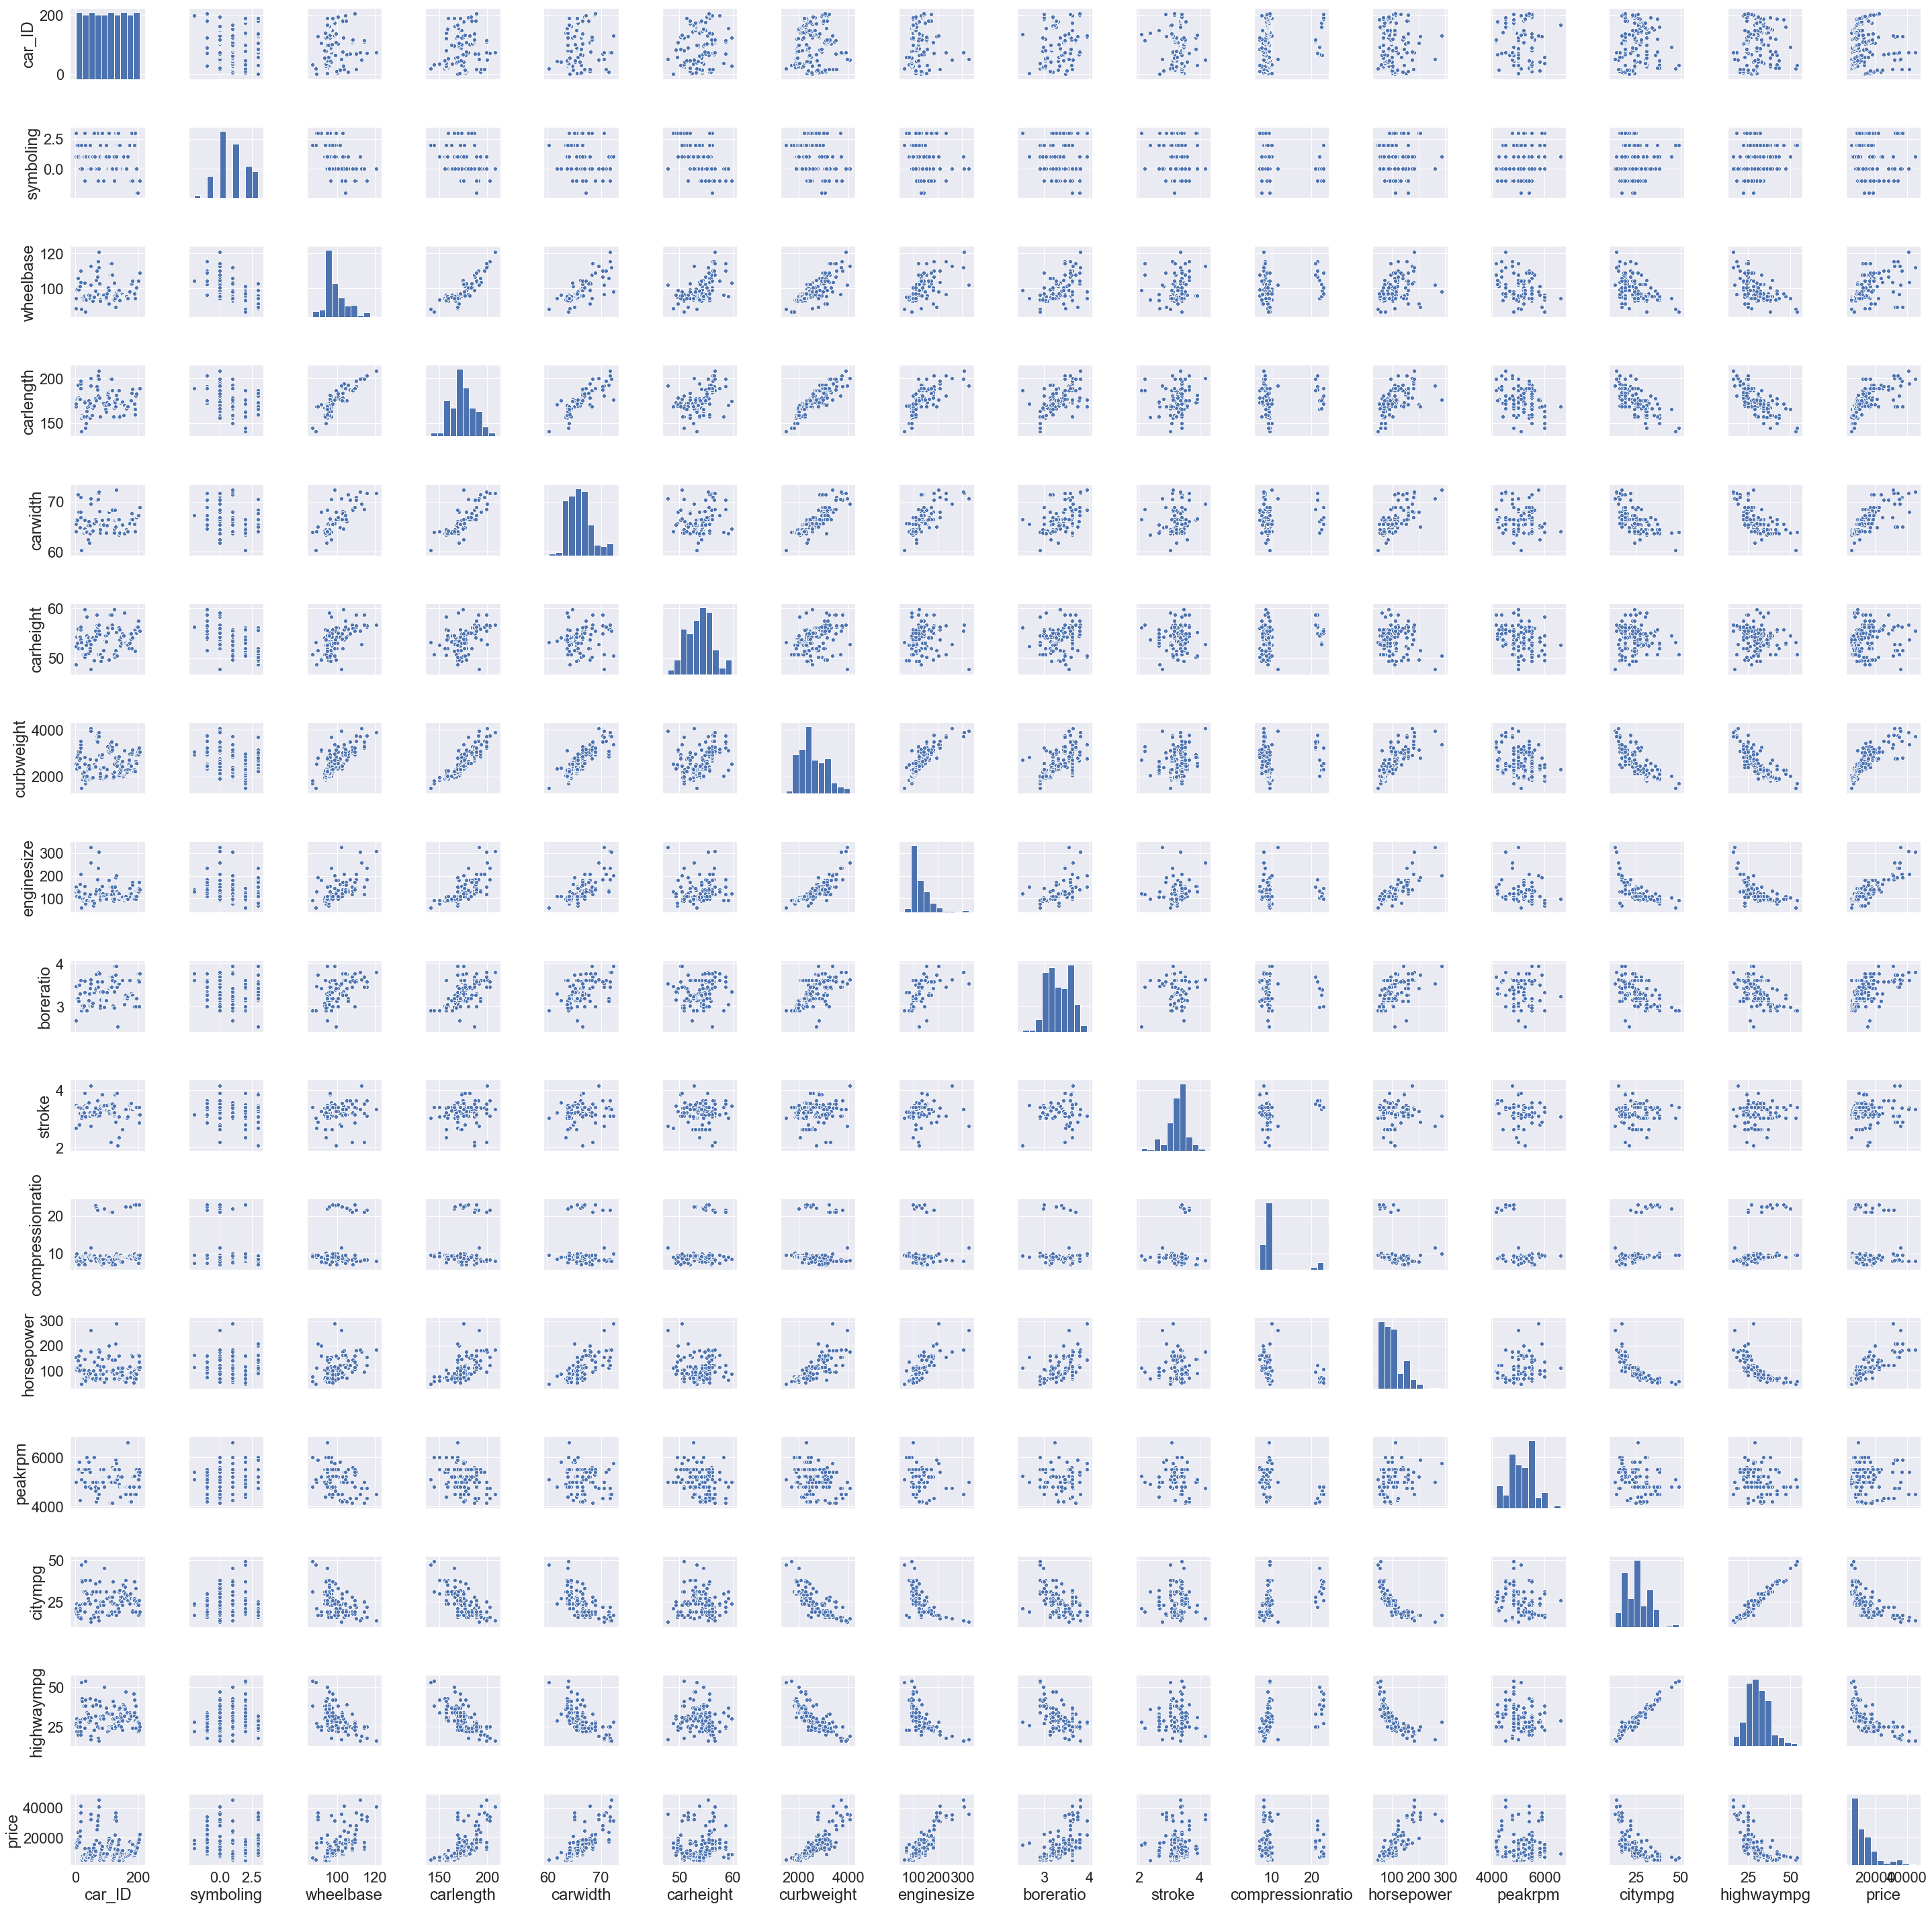

In [267]:
# Let's plot a pair plot of all variables in our dataframe
sns.set(font_scale=2)
sns.pairplot(car_price_df)

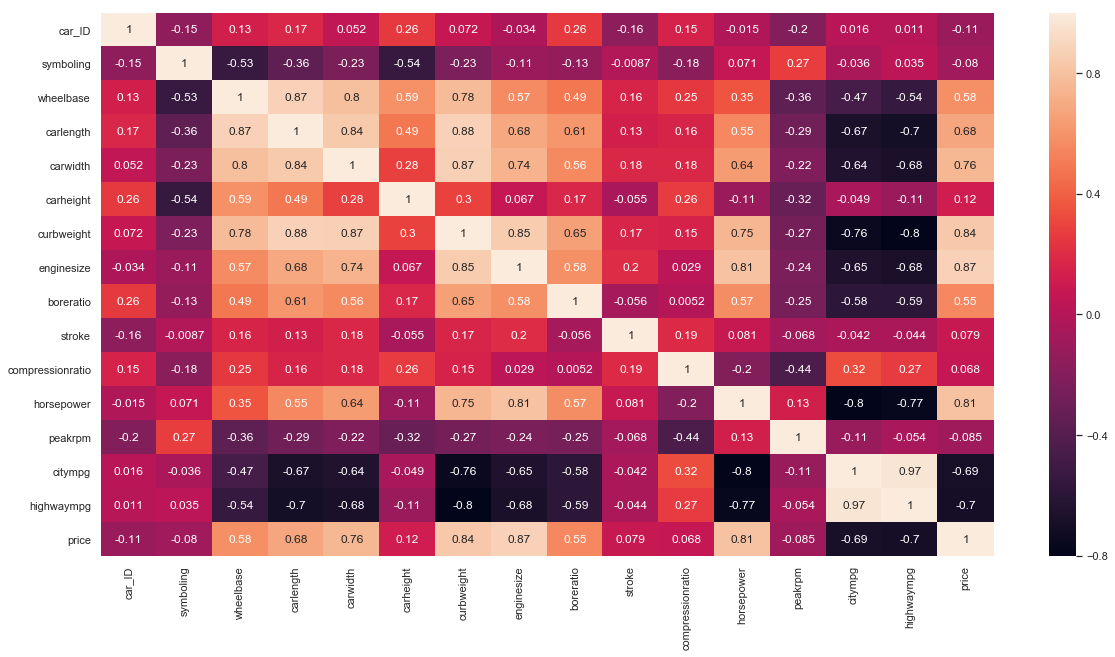

In [268]:
# Draw
sns.set(font_scale=1)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_df.corr(),annot = True)

In [269]:
car_price_df.drop(['carwidth','curbweight','wheelbase','highwaympg'], axis =1, inplace = True)

#We can also remove carID  as its just a serial number 
car_price_df.drop(['car_ID'], axis =1, inplace = True)

# Check correlation of other categorical variable with price

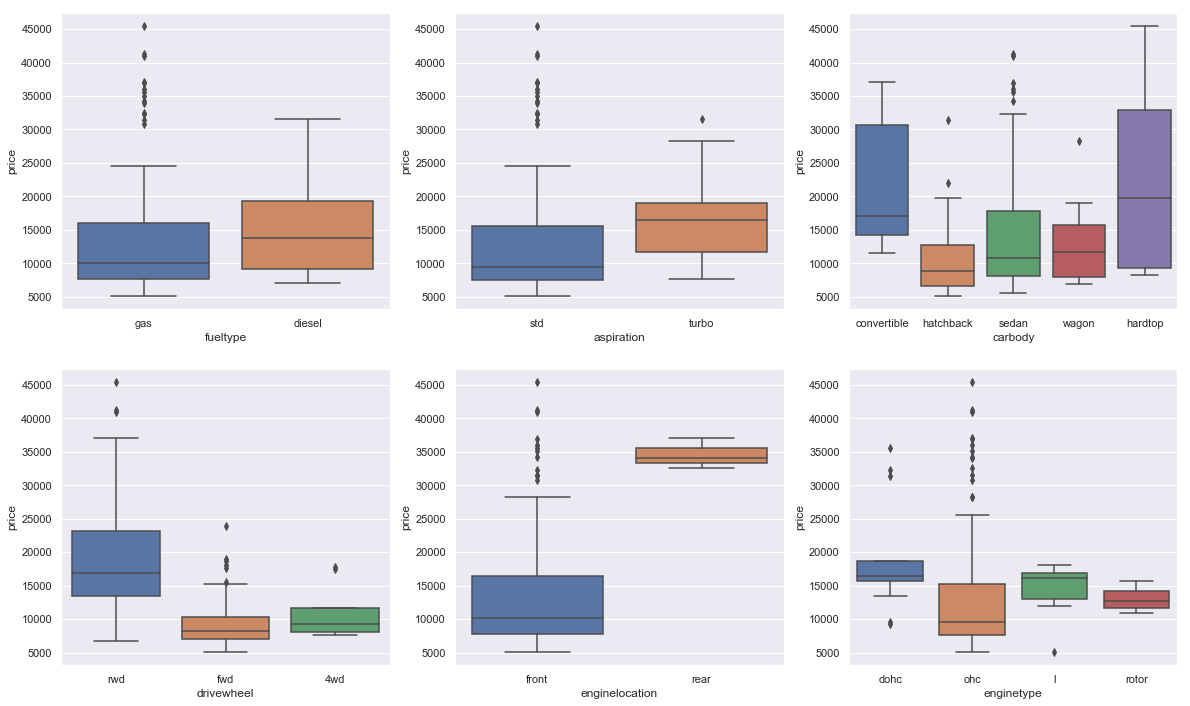

In [270]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = car_price_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price_df)
plt.show()

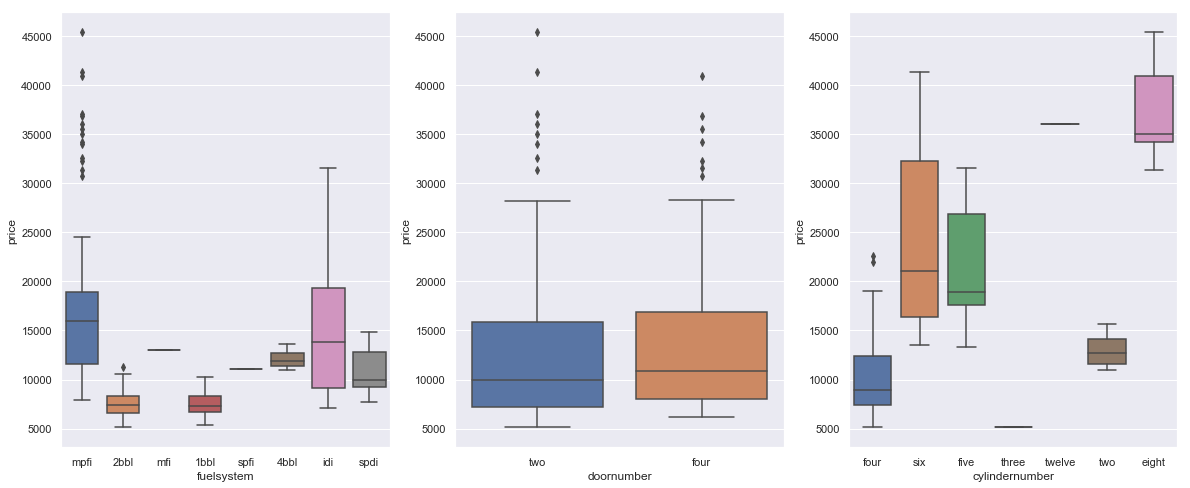

In [271]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price_df)
plt.subplot(1,3,2)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price_df)
plt.subplot(1,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price_df)
plt.show()

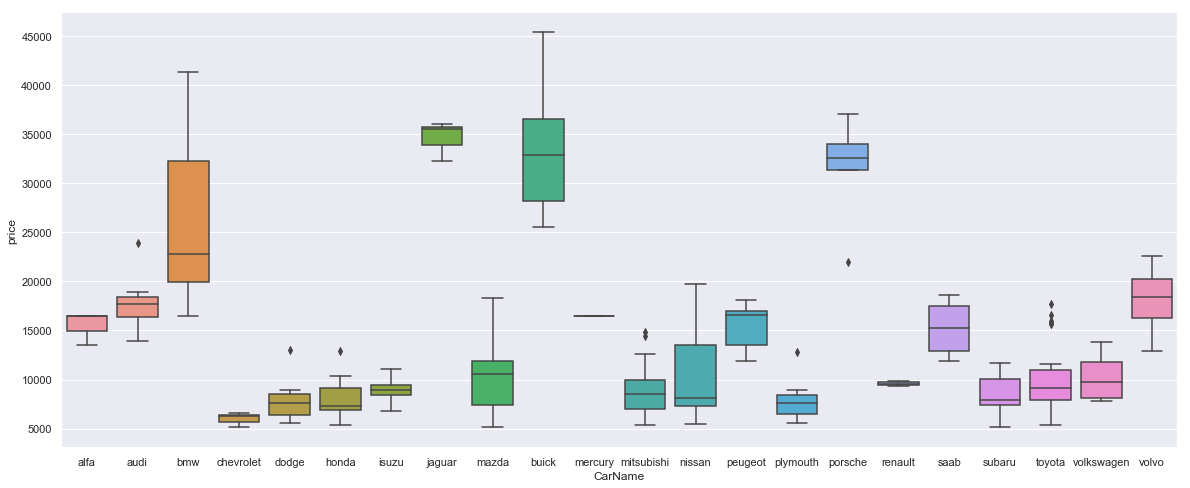

In [272]:
plt.figure(figsize=(20, 8))
sns.boxplot(x = 'CarName', y = 'price', data = car_price_df)
plt.show()

# Check outliers in data

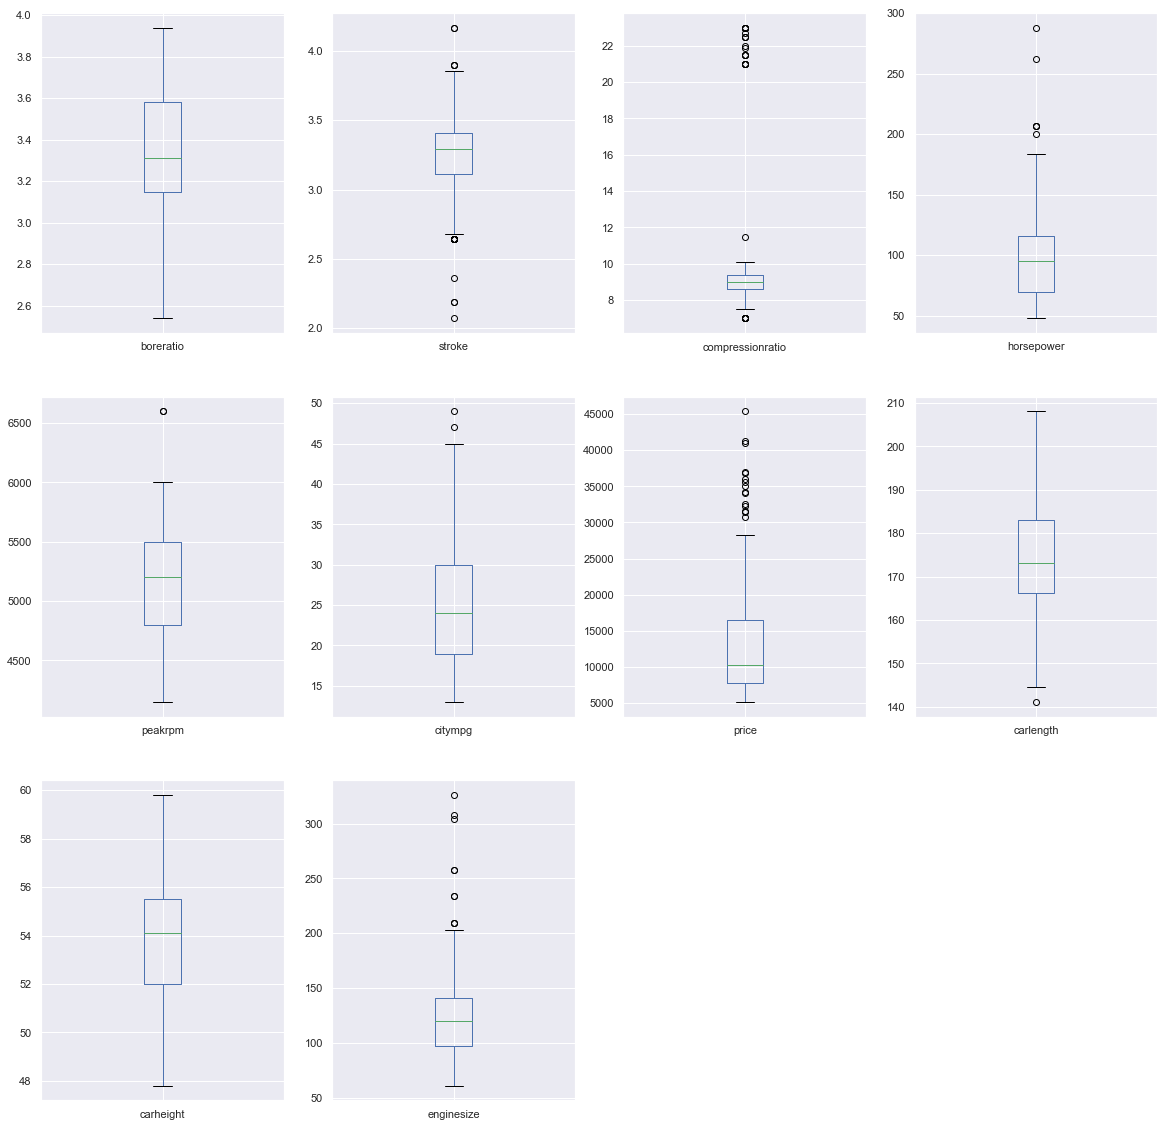

In [273]:
plt.figure(figsize=(20, 20))
plt.subplot(3,4,1)
car_price_df.boxplot(column=['boreratio']);
plt.subplot(3,4,2)
car_price_df.boxplot(column=['stroke']);
plt.subplot(3,4,3)
car_price_df.boxplot(column=['compressionratio']);
plt.subplot(3,4,4)
car_price_df.boxplot(column=['horsepower']);
plt.subplot(3,4,5)
car_price_df.boxplot(column=['peakrpm']);
plt.subplot(3,4,6)
car_price_df.boxplot(column=['citympg']);
plt.subplot(3,4,7)
car_price_df.boxplot(column=['price']);
plt.subplot(3,4,8)
car_price_df.boxplot(column=['carlength']);
plt.subplot(3,4,9)
car_price_df.boxplot(column=['carheight']);
plt.subplot(3,4,10)
car_price_df.boxplot(column=['enginesize']);
plt.show()


# Convert factors with 2 levels to dummy

In [274]:
# Convert fuel type to 0 and 1
fueltype = pd.get_dummies(car_price_df['fueltype'], prefix='fueltype',drop_first = True)
car_price_df = pd.concat([car_price_df, fueltype], axis = 1)
car_price_df.drop(['fueltype'], axis = 1, inplace = True)
car_price_df.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas
0,3,alfa,std,two,convertible,rwd,front,168.8,48.8,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,1
1,3,alfa,std,two,convertible,rwd,front,168.8,48.8,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,1
2,1,alfa,std,two,hatchback,rwd,front,171.2,52.4,ohc,...,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,1
3,2,audi,std,four,sedan,fwd,front,176.6,54.3,ohc,...,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,1
4,2,audi,std,four,sedan,4wd,front,176.6,54.3,ohc,...,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,1


In [275]:
# Convert aspiration to 0 and 1
aspiration = pd.get_dummies(car_price_df['aspiration'], prefix='aspiration',drop_first = True)
car_price_df = pd.concat([car_price_df, aspiration], axis = 1)
car_price_df.drop(['aspiration'], axis = 1, inplace = True)
car_price_df.head()

,symboling,CarName,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo
0,3,alfa,two,convertible,rwd,front,168.8,48.8,dohc,four,...,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,1,0
1,3,alfa,two,convertible,rwd,front,168.8,48.8,dohc,four,...,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,1,0
2,1,alfa,two,hatchback,rwd,front,171.2,52.4,ohc,six,...,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,1,0
3,2,audi,four,sedan,fwd,front,176.6,54.3,ohc,four,...,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,1,0
4,2,audi,four,sedan,4wd,front,176.6,54.3,ohc,five,...,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,1,0


In [276]:
# Convert doornumber to 0 and 1
doornumber = pd.get_dummies(car_price_df['doornumber'], prefix='door',drop_first = True)
car_price_df = pd.concat([car_price_df, doornumber], axis = 1)
car_price_df.drop(['doornumber'], axis = 1, inplace = True)
car_price_df.head()

,symboling,CarName,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo,door_two
0,3,alfa,convertible,rwd,front,168.8,48.8,dohc,four,130,...,3.47,2.68,9.0,111,5000,21,13495.0,1,0,1
1,3,alfa,convertible,rwd,front,168.8,48.8,dohc,four,130,...,3.47,2.68,9.0,111,5000,21,16500.0,1,0,1
2,1,alfa,hatchback,rwd,front,171.2,52.4,ohc,six,152,...,2.68,3.47,9.0,154,5000,19,16500.0,1,0,1
3,2,audi,sedan,fwd,front,176.6,54.3,ohc,four,109,...,3.19,3.40,10.0,102,5500,24,13950.0,1,0,0
4,2,audi,sedan,4wd,front,176.6,54.3,ohc,five,136,...,3.19,3.40,8.0,115,5500,18,17450.0,1,0,0


In [277]:
# Convert engine location to 0 and 1
enginelocation = pd.get_dummies(car_price_df['enginelocation'], prefix='enginelocation',drop_first = True)
car_price_df = pd.concat([car_price_df, enginelocation], axis = 1)
car_price_df.drop(['enginelocation'], axis = 1, inplace = True)
car_price_df.head()

,symboling,CarName,carbody,drivewheel,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,...,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo,door_two,enginelocation_rear
0,3,alfa,convertible,rwd,168.8,48.8,dohc,four,130,mpfi,...,2.68,9.0,111,5000,21,13495.0,1,0,1,0
1,3,alfa,convertible,rwd,168.8,48.8,dohc,four,130,mpfi,...,2.68,9.0,111,5000,21,16500.0,1,0,1,0
2,1,alfa,hatchback,rwd,171.2,52.4,ohc,six,152,mpfi,...,3.47,9.0,154,5000,19,16500.0,1,0,1,0
3,2,audi,sedan,fwd,176.6,54.3,ohc,four,109,mpfi,...,3.40,10.0,102,5500,24,13950.0,1,0,0,0
4,2,audi,sedan,4wd,176.6,54.3,ohc,five,136,mpfi,...,3.40,8.0,115,5500,18,17450.0,1,0,0,0


#  Convert multilevel variables to dummy 

In [278]:
# Convert carbody to 0 and 1
carbody = pd.get_dummies(car_price_df['carbody'], prefix='carbody',drop_first = True)
car_price_df = pd.concat([car_price_df, carbody], axis = 1)
car_price_df.drop(['carbody'], axis = 1, inplace = True)
car_price_df.head()

,symboling,CarName,drivewheel,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,...,citympg,price,fueltype_gas,aspiration_turbo,door_two,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,alfa,rwd,168.8,48.8,dohc,four,130,mpfi,3.47,...,21,13495.0,1,0,1,0,0,0,0,0
1,3,alfa,rwd,168.8,48.8,dohc,four,130,mpfi,3.47,...,21,16500.0,1,0,1,0,0,0,0,0
2,1,alfa,rwd,171.2,52.4,ohc,six,152,mpfi,2.68,...,19,16500.0,1,0,1,0,0,1,0,0
3,2,audi,fwd,176.6,54.3,ohc,four,109,mpfi,3.19,...,24,13950.0,1,0,0,0,0,0,1,0
4,2,audi,4wd,176.6,54.3,ohc,five,136,mpfi,3.19,...,18,17450.0,1,0,0,0,0,0,1,0


In [279]:
# Convert drive wheel to 0 and 1
drivewheel = pd.get_dummies(car_price_df['drivewheel'], prefix='drivewheel',drop_first = True)
car_price_df = pd.concat([car_price_df, drivewheel], axis = 1)
car_price_df.drop(['drivewheel'], axis = 1, inplace = True)
car_price_df.head()

,symboling,CarName,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,...,fueltype_gas,aspiration_turbo,door_two,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,3,alfa,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,...,1,0,1,0,0,0,0,0,0,1
1,3,alfa,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,...,1,0,1,0,0,0,0,0,0,1
2,1,alfa,171.2,52.4,ohc,six,152,mpfi,2.68,3.47,...,1,0,1,0,0,1,0,0,0,1
3,2,audi,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,...,1,0,0,0,0,0,1,0,1,0
4,2,audi,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,...,1,0,0,0,0,0,1,0,0,0


In [280]:
# Convert engine type to 0 and 1
enginetype = pd.get_dummies(car_price_df['enginetype'], prefix='enginetype',drop_first = True)
car_price_df = pd.concat([car_price_df, enginetype], axis = 1)
car_price_df.drop(['enginetype'], axis = 1, inplace = True)
car_price_df.head()

,symboling,CarName,carlength,carheight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,...,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_rotor
0,3,alfa,168.8,48.8,four,130,mpfi,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,0
1,3,alfa,168.8,48.8,four,130,mpfi,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,0
2,1,alfa,171.2,52.4,six,152,mpfi,2.68,3.47,9.0,...,0,0,1,0,0,0,1,0,1,0
3,2,audi,176.6,54.3,four,109,mpfi,3.19,3.40,10.0,...,0,0,0,1,0,1,0,0,1,0
4,2,audi,176.6,54.3,five,136,mpfi,3.19,3.40,8.0,...,0,0,0,1,0,0,0,0,1,0


In [281]:
# Convert cylinder number to 0 and 1
cylindernumber = pd.get_dummies(car_price_df['cylindernumber'],prefix='cylindernumber',drop_first = True)
car_price_df = pd.concat([car_price_df, cylindernumber], axis = 1)
car_price_df.drop(['cylindernumber'], axis = 1, inplace = True)
car_price_df.head()

,symboling,CarName,carlength,carheight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,...,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,alfa,168.8,48.8,130,mpfi,3.47,2.68,9.0,111,...,1,0,0,0,0,1,0,0,0,0
1,3,alfa,168.8,48.8,130,mpfi,3.47,2.68,9.0,111,...,1,0,0,0,0,1,0,0,0,0
2,1,alfa,171.2,52.4,152,mpfi,2.68,3.47,9.0,154,...,1,0,1,0,0,0,1,0,0,0
3,2,audi,176.6,54.3,109,mpfi,3.19,3.40,10.0,102,...,0,0,1,0,0,1,0,0,0,0
4,2,audi,176.6,54.3,136,mpfi,3.19,3.40,8.0,115,...,0,0,1,0,1,0,0,0,0,0


In [282]:
# Convert fuel system to 0 and 1
fuelsystem = pd.get_dummies(car_price_df['fuelsystem'], prefix='fuelsystem',drop_first = True)
car_price_df = pd.concat([car_price_df, fuelsystem], axis = 1)
car_price_df.drop(['fuelsystem'], axis = 1, inplace = True)
car_price_df.head()

,symboling,CarName,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,alfa,168.8,48.8,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa,168.8,48.8,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa,171.2,52.4,152,2.68,3.47,9.0,154,5000,...,0,0,0,0,0,0,0,1,0,0
3,2,audi,176.6,54.3,109,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,2,audi,176.6,54.3,136,3.19,3.40,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0


In [283]:
# Convert Car Name to 0 and 1
CarName = pd.get_dummies(car_price_df['CarName'], prefix='CarName',drop_first = True)
car_price_df = pd.concat([car_price_df, CarName], axis = 1)
car_price_df.drop(['CarName'], axis = 1, inplace = True)
car_price_df.head()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
0,3,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,...,0,0,0,0,0,0,0,0,0,0
1,3,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,...,0,0,0,0,0,0,0,0,0,0
2,1,171.2,52.4,152,2.68,3.47,9.0,154,5000,19,...,0,0,0,0,0,0,0,0,0,0
3,2,176.6,54.3,109,3.19,3.40,10.0,102,5500,24,...,0,0,0,0,0,0,0,0,0,0
4,2,176.6,54.3,136,3.19,3.40,8.0,115,5500,18,...,0,0,0,0,0,0,0,0,0,0


In [284]:
# inspect data after dummy variable creation
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 58 columns):
symboling                205 non-null int64
carlength                205 non-null float64
carheight                205 non-null float64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
price                    205 non-null float64
fueltype_gas             205 non-null uint8
aspiration_turbo         205 non-null uint8
door_two                 205 non-null uint8
enginelocation_rear      205 non-null uint8
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8
carbody_sedan            205 non-null uint8
carbody_wagon            205 non-null uint8
drivewheel_fwd           205 non-null uint8
dri

In [285]:
# Check shape after dummy variable creation
car_price_df.shape

(205, 58)

# Splitting the Data into Training and Testing Sets

In [286]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_price_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [287]:
df_train.head()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
122,1,167.3,50.8,98,2.97,3.23,9.4,68,5500,31,...,0,0,1,0,0,0,0,0,0,0
125,3,168.9,50.2,151,3.94,3.11,9.5,143,5500,19,...,0,0,0,1,0,0,0,0,0,0
166,1,168.7,52.6,98,3.24,3.08,9.4,112,6600,26,...,0,0,0,0,0,0,0,1,0,0
1,3,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,...,0,0,0,0,0,0,0,0,0,0
199,-1,188.8,57.5,130,3.62,3.15,7.5,162,5100,17,...,0,0,0,0,0,0,0,0,0,1


# Rescaling the Features

In [288]:
# Here we will use Standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [289]:
# Rows on which scaling needs to be done as dummy variables are already 1 or 0
num_vars = ['symboling', 'carlength', 'carheight',
             'enginesize', 'boreratio', 'stroke', 
            'compressionratio','horsepower','peakrpm', 'citympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [290]:
# check train data after scaling
df_train.head()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
122,0.170159,-0.487238,-1.134628,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-0.359789,-1.382026,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-0.375720,-0.392434,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-0.367754,-1.959288,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,1.225364,1.627983,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,...,0,0,0,0,0,0,0,0,0,1


In [291]:
# check train data description after scaling
df_train.describe()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.473477e-17,2.003060e-16,5.450186e-16,-4.308908e-17,-1.059758e-15,2.155230e-15,7.259151e-17,1.195625e-16,6.009179e-16,2.655219e-16,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-2.574223e+00,-2.371619e+00,-1.566427e+00,-2.412359e+00,-3.403827e+00,-8.072216e-01,-1.378157e+00,-2.043565e+00,-1.855458e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-6.186702e-01,-7.222984e-01,-6.847340e-01,-9.320600e-01,-4.497569e-01,-3.841200e-01,-8.223718e-01,-6.882361e-01,-9.570476e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,-1.128552e-01,6.112865e-02,-3.663447e-01,9.948427e-03,6.399437e-02,-2.783446e-01,-2.160603e-01,1.458127e-01,-5.863749e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,7.076008e-01,7.414732e-01,3.928914e-01,8.942829e-01,4.814173e-01,-1.725692e-01,3.397252e-01,7.713493e-01,8.397726e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,2.324616e+00,2.287711e+00,4.923816e+00,2.432256e+00,2.953845e+00,3.423794e+00,4.684957e+00,3.064983e+00,3.535003e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [292]:
# create x and y train
y_train = df_train.pop('price')
X_train = df_train

# Building model using RFE
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [293]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [294]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [295]:
# RFE ranking list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 33),
 ('carlength', False, 9),
 ('carheight', False, 27),
 ('enginesize', True, 1),
 ('boreratio', False, 5),
 ('stroke', False, 19),
 ('compressionratio', False, 11),
 ('horsepower', True, 1),
 ('peakrpm', False, 23),
 ('citympg', False, 32),
 ('fueltype_gas', False, 12),
 ('aspiration_turbo', False, 10),
 ('door_two', False, 24),
 ('enginelocation_rear', True, 1),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 31),
 ('drivewheel_rwd', False, 34),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 29),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', False, 3),
 ('cylindernumber_six', False, 18),
 ('cylindernumber_three', False, 4),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1),
 ('fuelsystem_2bbl', False, 22),
 ('fuelsystem_4bbl', False, 28),
 ('fuelsystem_idi', True, 1),
 ('fuelsystem_mfi', 

In [296]:
# Columns select by RFE
col = X_train.columns[rfe.support_]
col

Index(['enginesize', 'horsepower', 'enginelocation_rear', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginetype_l',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_idi', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_jaguar', 'CarName_porsche', 'CarName_saab',
       'CarName_volvo'],
      dtype='object')

In [297]:
# Columns ignored by RFE
print(X_train.columns[~rfe.support_])
columns = X_train.columns[~rfe.support_]

Index(['symboling', 'carlength', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'fueltype_gas',
       'aspiration_turbo', 'door_two', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_ohc', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen'],
      dtype='object')


In [298]:
# Create new data frame with columns selected in RFE
df_new_car = car_price_df.drop(columns,axis =1)
df_new_car.head()

,enginesize,horsepower,price,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_l,enginetype_rotor,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_idi,CarName_audi,CarName_bmw,CarName_buick,CarName_jaguar,CarName_porsche,CarName_saab,CarName_volvo
0,130,111,13495.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,130,111,16500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,152,154,16500.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,109,102,13950.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,136,115,17450.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


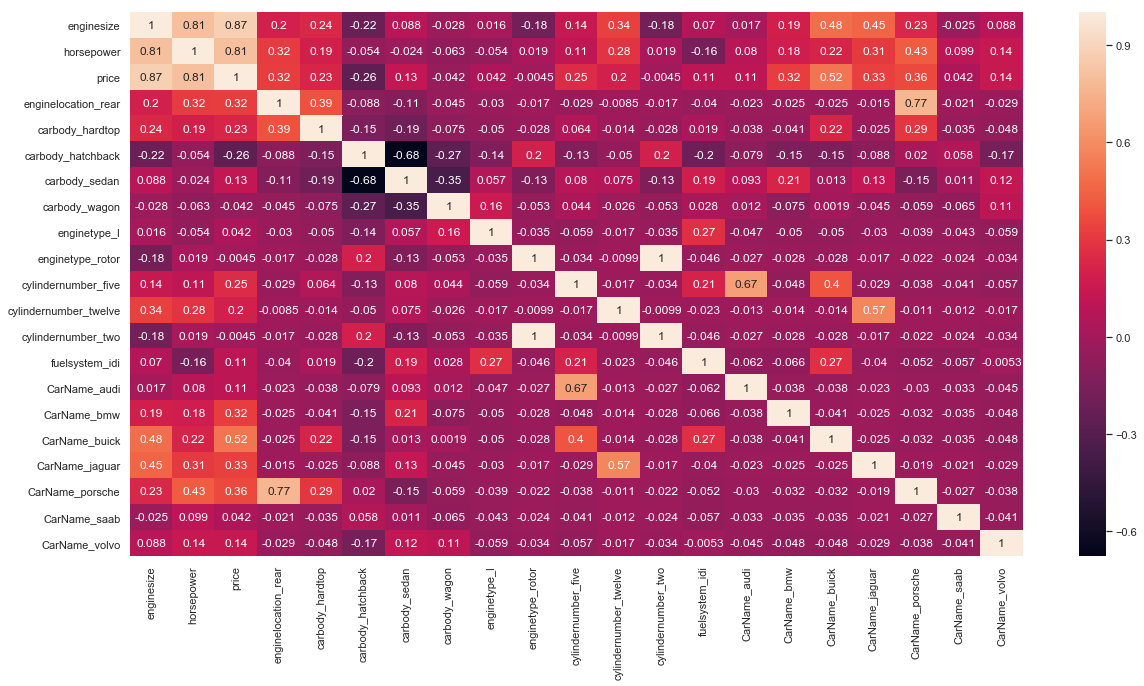

In [299]:
# Create heatmap of columns selected in RFE 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_new_car.corr(),annot = True)

# Building model using statsmodel, for the detailed statistics

In [300]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     98.02
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.60e-65
Time:                        22:02:52   Log-Likelihood:                -4.0400
No. Observations:                 143   AIC:                             48.08
Df Residuals:                     123   BIC:                             107.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [301]:
# Create function to calculate VIF values after creating model
def calculateVIF(df):
    df = df.drop(['const'], axis=1)
    
    # Calculate the VIFs for the new model
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [302]:
calculateVIF(X_train_rfe)

,Features,VIF
8,enginetype_rotor,inf
11,cylindernumber_two,inf
0,enginesize,11.290000
1,horsepower,7.580000
9,cylindernumber_five,4.650000
13,CarName_audi,3.610000
15,CarName_buick,2.780000
16,CarName_jaguar,2.770000
17,CarName_porsche,2.060000
2,enginelocation_rear,2.030000


In [303]:

X_train_new = X_train_rfe.drop(["cylindernumber_two"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     98.02
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.60e-65
Time:                        22:02:57   Log-Likelihood:                -4.0400
No. Observations:                 143   AIC:                             48.08
Df Residuals:                     123   BIC:                             107.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [304]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,11.29
1,horsepower,7.58
9,cylindernumber_five,4.65
12,CarName_audi,3.61
14,CarName_buick,2.78
15,CarName_jaguar,2.77
16,CarName_porsche,2.06
2,enginelocation_rear,2.03
11,fuelsystem_idi,1.92
5,carbody_sedan,1.80


In [305]:
X_train_new = X_train_new.drop(["cylindernumber_five"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.83e-66
Time:                        22:03:03   Log-Likelihood:                -4.2580
No. Observations:                 143   AIC:                             46.52
Df Residuals:                     124   BIC:                             102.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [306]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,10.78
1,horsepower,7.29
14,CarName_jaguar,2.73
15,CarName_porsche,2.06
2,enginelocation_rear,2.03
13,CarName_buick,1.85
5,carbody_sedan,1.79
10,fuelsystem_idi,1.75
9,cylindernumber_twelve,1.57
8,enginetype_rotor,1.57


In [307]:
X_train_new = X_train_new.drop(["carbody_hardtop"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.90e-66
Time:                        22:03:08   Log-Likelihood:                -6.3151
No. Observations:                 143   AIC:                             48.63
Df Residuals:                     125   BIC:                             102.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

In [308]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,10.77
1,horsepower,7.27
13,CarName_jaguar,2.73
14,CarName_porsche,2.06
12,CarName_buick,1.85
4,carbody_sedan,1.79
9,fuelsystem_idi,1.75
8,cylindernumber_twelve,1.57
7,enginetype_rotor,1.57
2,enginelocation_rear,1.54


In [309]:
X_train_new = X_train_new.drop(["enginelocation_rear"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     113.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.46e-66
Time:                        22:03:10   Log-Likelihood:                -7.6649
No. Observations:                 143   AIC:                             49.33
Df Residuals:                     126   BIC:                             99.70
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [310]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,10.69
1,horsepower,7.20
12,CarName_jaguar,2.73
11,CarName_buick,1.85
3,carbody_sedan,1.79
8,fuelsystem_idi,1.74
7,cylindernumber_twelve,1.57
6,enginetype_rotor,1.56
13,CarName_porsche,1.44
10,CarName_bmw,1.42


In [311]:
X_train_new = X_train_new.drop(["horsepower"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     100.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.08e-62
Time:                        22:03:16   Log-Likelihood:                -20.524
No. Observations:                 143   AIC:                             73.05
Df Residuals:                     127   BIC:                             120.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [312]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,3.08
11,CarName_jaguar,2.41
2,carbody_sedan,1.79
10,CarName_buick,1.70
6,cylindernumber_twelve,1.56
7,fuelsystem_idi,1.51
9,CarName_bmw,1.41
4,enginetype_l,1.31
1,carbody_hatchback,1.27
12,CarName_porsche,1.20


In [313]:
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.61e-63
Time:                        22:03:18   Log-Likelihood:                -21.578
No. Observations:                 143   AIC:                             73.16
Df Residuals:                     128   BIC:                             117.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [314]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,2.94
10,CarName_jaguar,2.36
2,carbody_sedan,1.74
9,CarName_buick,1.63
5,cylindernumber_twelve,1.56
6,fuelsystem_idi,1.50
8,CarName_bmw,1.39
1,carbody_hatchback,1.26
3,enginetype_l,1.23
11,CarName_porsche,1.20


In [315]:
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.42e-64
Time:                        22:03:23   Log-Likelihood:                -22.850
No. Observations:                 143   AIC:                             73.70
Df Residuals:                     129   BIC:                             115.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [316]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,2.70
9,CarName_jaguar,2.10
8,CarName_buick,1.56
4,cylindernumber_twelve,1.55
5,fuelsystem_idi,1.41
1,carbody_hatchback,1.23
2,enginetype_l,1.20
10,CarName_porsche,1.18
3,enginetype_rotor,1.16
7,CarName_bmw,1.14


In [317]:
X_train_new = X_train_new.drop(["fuelsystem_idi"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.52e-64
Time:                        22:03:26   Log-Likelihood:                -23.788
No. Observations:                 143   AIC:                             73.58
Df Residuals:                     130   BIC:                             112.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [318]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,2.69
8,CarName_jaguar,2.10
4,cylindernumber_twelve,1.55
7,CarName_buick,1.35
1,carbody_hatchback,1.23
9,CarName_porsche,1.18
3,enginetype_rotor,1.16
6,CarName_bmw,1.14
11,CarName_volvo,1.03
2,enginetype_l,1.01


In [319]:
X_train_new = X_train_new.drop(["carbody_hatchback"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.65e-65
Time:                        22:03:32   Log-Likelihood:                -25.419
No. Observations:                 143   AIC:                             74.84
Df Residuals:                     131   BIC:                             110.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

In [320]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,2.49
7,CarName_jaguar,2.05
3,cylindernumber_twelve,1.55
6,CarName_buick,1.32
5,CarName_bmw,1.13
2,enginetype_rotor,1.11
8,CarName_porsche,1.10
10,CarName_volvo,1.03
1,enginetype_l,1.00
4,CarName_audi,1.00


In [321]:
X_train_new = X_train_new.drop(["cylindernumber_twelve"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     139.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.11e-65
Time:                        22:03:38   Log-Likelihood:                -28.048
No. Observations:                 143   AIC:                             78.10
Df Residuals:                     132   BIC:                             110.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2715      0.034  

In [322]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,2.41
6,CarName_jaguar,1.74
5,CarName_buick,1.31
4,CarName_bmw,1.12
2,enginetype_rotor,1.11
7,CarName_porsche,1.10
9,CarName_volvo,1.02
1,enginetype_l,1.00
3,CarName_audi,1.00
8,CarName_saab,1.00


In [323]:
X_train_new = X_train_new.drop(["CarName_jaguar"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.19e-65
Time:                        22:03:46   Log-Likelihood:                -30.827
No. Observations:                 143   AIC:                             81.65
Df Residuals:                     133   BIC:                             111.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2405      0.031  

In [324]:
calculateVIF(X_train_new)

,Features,VIF
0,enginesize,1.39
5,CarName_buick,1.18
4,CarName_bmw,1.07
2,enginetype_rotor,1.06
6,CarName_porsche,1.06
8,CarName_volvo,1.01
1,enginetype_l,1.00
3,CarName_audi,1.00
7,CarName_saab,1.00


# Model evaluation

In [325]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

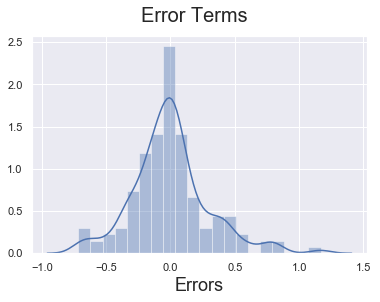

In [326]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [327]:
# columns for scaling data 
num_vars = ['symboling', 'carlength', 'carheight'
            , 'enginesize', 'boreratio', 'stroke', 
            'compressionratio','horsepower','peakrpm', 'citympg','price']

# Scale test data set 
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [328]:
# Check test data set after scaling 
df_test.describe()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,-3.939501e-17,5.837624e-16,2.897324e-15,-5.372047e-17,1.428964e-15,-9.920380e-16,1.790682e-16,1.862310e-16,-5.694370e-16,-2.435328e-16,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,-2.166306e+00,-2.667447e+00,-1.953015e+00,-1.224435e+00,-2.946125e+00,-3.794120e+00,-7.712531e-01,-1.432805e+00,-2.064433e+00,-1.762005e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.822068e-01,-5.314570e-01,-8.161456e-01,-5.468312e-01,-6.698820e-01,-3.729744e-01,-4.259159e-01,-8.735755e-01,-6.720204e-01,-9.479638e-01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.984270e-02,-6.110781e-02,1.346907e-01,-2.430780e-01,3.050053e-02,2.605712e-01,-3.108035e-01,-1.857877e-01,-2.435858e-01,-1.339229e-01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.018922e-01,8.515423e-01,6.514496e-01,3.118558e-01,8.359405e-01,6.090212e-01,-2.187136e-01,2.898786e-01,7.739464e-01,6.801181e-01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.543942e+00,2.812769e+00,2.346419e+00,4.126296e+00,1.466285e+00,2.002821e+00,2.912344e+00,2.552508e+00,3.183891e+00,2.145392e+00,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [329]:
# Create x and y for test data set
y_test = df_test.pop('price')
X_test = df_test

In [330]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [331]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

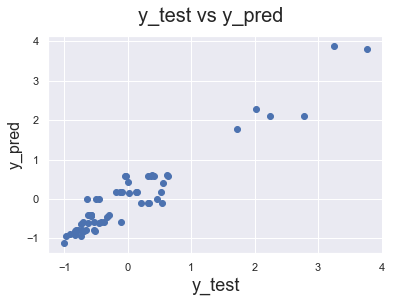

In [332]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Calculate the R-squared score on the test set.

In [333]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [334]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.08718196558289723
r_square_value : 0.9128180344171027


Text(0, 0.5, 'Car Price')

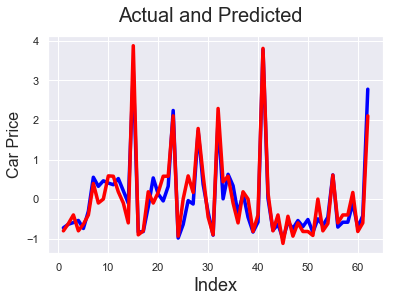

In [335]:
# Actual vs Predicted plot
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

Text(0, 0.5, 'ytest-ypred')

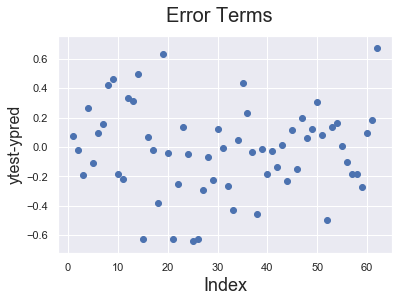

In [336]:
# Error terms distribution
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_pred)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

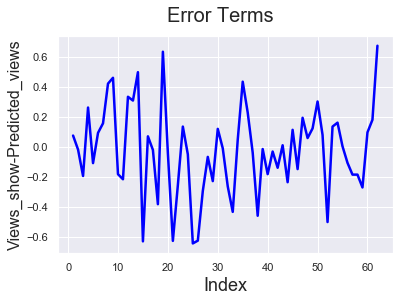

In [337]:
# Error terms plot
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

# Conclusion